In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Import Data

In [88]:
df = pd.read_csv('Dataset/heart.csv')
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Preprocessing

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [90]:
#cek data yang kosong
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

penjelasan yang membantu dalam membandingkan data kategorikal (double click)
<!-- https://medium.com/@adiptamartulandi/data-preprocessing-pada-machine-learning-handling-categorical-data-ucupstory-6e409dbfd0a0 -->

In [91]:
# karena 'cp', 'thal' dan 'slope' adalah categorical, kita ubah dulu menjadi dummy variable
a = pd.get_dummies(df['cp'], prefix = "cp")
b = pd.get_dummies(df['thal'], prefix = "thal")
c = pd.get_dummies(df['slope'], prefix = "slope")

In [92]:
frame = [df, a, b, c]
df = pd.concat(frame, axis = 1)
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,3,145,233,1,0,150,0,2.3,...,0,0,1,0,1,0,0,1,0,0
1,37,1,2,130,250,0,1,187,0,3.5,...,0,1,0,0,0,1,0,1,0,0
2,41,0,1,130,204,0,0,172,0,1.4,...,1,0,0,0,0,1,0,0,0,1
3,56,1,1,120,236,0,1,178,0,0.8,...,1,0,0,0,0,1,0,0,0,1
4,57,0,0,120,354,0,1,163,1,0.6,...,0,0,0,0,0,1,0,0,0,1


In [93]:
x = df.drop(['target'], axis = 1)
y = df.target.values #dependent

In [94]:
# normalisasi data (x-x.min) / (x.max - x.min)
X = (x - np.min(x)) / (np.max(x) - np.min(x)).values #independent

# Klasifikasi

## 1. SVM

### 1.1 Kernel Linear

In [9]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [10]:
# bagi data menjadi training dan test
from sklearn.model_selection import train_test_split,cross_val_score

X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size=0.3,random_state=47)

In [11]:
linear_svc = svm.SVC(kernel='linear')
linear_svc.kernel

'linear'

In [12]:
linear_svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [13]:
y_pred = linear_svc.predict(X_test)
print(y_pred)

[0 0 1 0 1 0 0 1 1 0 1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1
 1 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1
 1 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1]


In [14]:
#akurasi
akurasi_score = accuracy_score(y_test,y_pred)
print(akurasi_score)

0.8241758241758241


In [15]:
#f1 score
f1_score = f1_score(y_test, y_pred, average ="macro") #average ada 3 : macro, micro, weighted
print(f1_score)

0.8192651439920556


In [16]:
# Cross Validation
scores = cross_val_score(linear_svc, X, y, cv=5)
print(scores)
print(scores.mean())

[0.81967213 0.90163934 0.78688525 0.86666667 0.78333333]
0.8316393442622951


In [17]:
# confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[30  9]
 [ 7 45]]


In [18]:
# report classification (precision, recall, f1-score, support)
report = classification_report(y_test, y_pred)
print(report)

             precision    recall  f1-score   support

          0       0.81      0.77      0.79        39
          1       0.83      0.87      0.85        52

avg / total       0.82      0.82      0.82        91



### 1.2 Kernel Polynomial

In [19]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [20]:
# bagi data menjadi training dan test
from sklearn.model_selection import train_test_split,cross_val_score

X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size=0.3,random_state=48)

In [21]:
polynomial_svc = svm.SVC(kernel='poly', degree=8)
polynomial_svc.kernel

'poly'

In [22]:
polynomial_svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=8, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [23]:
y_pred_poly = polynomial_svc.predict(X_test)
print(y_pred_poly)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [24]:
#akurasi
akurasi_score_poly = accuracy_score(y_test,y_pred_poly)
print(akurasi_score_poly)

0.5054945054945055


In [25]:
#f1 score
f1_score_poly = f1_score(y_test, y_pred_poly, average ="macro") #average ada 3 : macro, micro, weighted
print(f1_score_poly)

0.3357664233576642


C:\Users\Spooky\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [26]:
# Cross Validation
scores = cross_val_score(polynomial_svc, X, y, cv=5)
print(scores)
print(scores.mean())

[0.54098361 0.54098361 0.54098361 0.55       0.55      ]
0.5445901639344262


In [27]:
# confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred_poly)

In [28]:
# report classification (precision, recall, f1-score, support)
report = classification_report(y_test, y_pred_poly)
print(report)

             precision    recall  f1-score   support

          0       0.00      0.00      0.00        45
          1       0.51      1.00      0.67        46

avg / total       0.26      0.51      0.34        91



C:\Users\Spooky\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### 1.3 Kernel Radiant Basis Function(RBF)

In [77]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [78]:
# bagi data menjadi training dan test
from sklearn.model_selection import train_test_split,cross_val_score

X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size=0.3,random_state=37)

In [79]:
rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.kernel

'rbf'

In [80]:
rbf_svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [81]:
y_pred_rbf = rbf_svc.predict(X_test)
print(y_pred_rbf)

[0 1 1 1 0 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 1 1 1 1 1 0 1
 0 0 1 0 0 0 1 0 1 0 1 1 0 1 1 1 1 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0
 1 0 0 1 1 0 0 0 1 0 0 1 0 1 1 0 1]


In [82]:
#akurasi
akurasi_score_rbf = accuracy_score(y_test,y_pred_rbf)
print(akurasi_score_rbf)

0.8351648351648352


In [83]:
#f1 score
f1_score_rbf = f1_score(y_test, y_pred_rbf, average ="macro") #average ada 3 : macro, micro, weighted
print(f1_score_rbf)

0.8338809784592918


In [84]:
# Cross Validation
scores = cross_val_score(rbf_svc, X, y, cv=5)
print(scores)
print(scores.mean())

[0.83606557 0.86885246 0.81967213 0.78333333 0.81666667]
0.8249180327868852


In [85]:
# confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred_rbf)
print(confusion_matrix)

[[34 10]
 [ 5 42]]


In [86]:
# report classification (precision, recall, f1-score, support)
report = classification_report(y_test, y_pred_rbf)
print(report)

             precision    recall  f1-score   support

          0       0.87      0.77      0.82        44
          1       0.81      0.89      0.85        47

avg / total       0.84      0.84      0.83        91



### 1.4 Kernel Sigmoid

In [39]:
from sklearn import svm
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [40]:
# bagi data menjadi training dan test
from sklearn.model_selection import train_test_split,cross_val_score

X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size=0.3,random_state=39)

In [41]:
sigmoid_svc = svm.SVC(kernel='sigmoid')
sigmoid_svc.kernel

'sigmoid'

In [42]:
sigmoid_svc.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='sigmoid',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [43]:
y_pred_sig = sigmoid_svc.predict(X_test)
print(y_pred_sig)

[1 1 0 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0
 1 1 0 0 0 0 1 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 1 0 0 0 1 1 0 1 1 1 1 0 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1]


In [44]:
#akurasi
akurasi_score_sig = accuracy_score(y_test,y_pred_sig)
print(akurasi_score_sig)

0.8681318681318682


In [45]:
#f1 score
f1_score_sig = f1_score(y_test, y_pred_sig, average ="macro") #average ada 3 : macro, micro, weighted
print(f1_score_sig)

0.8633633633633633


In [46]:
# Cross Validation
scores = cross_val_score(sigmoid_svc, X, y, cv=5)
print(scores)
print(scores.mean())

[0.83606557 0.8852459  0.83606557 0.8        0.83333333]
0.8381420765027322


In [47]:
# confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred_sig)
print(confusion_matrix)

[[31  6]
 [ 6 48]]


In [48]:
# report classification (precision, recall, f1-score, support)
report = classification_report(y_test, y_pred)
print(report)

             precision    recall  f1-score   support

          0       0.35      0.35      0.35        37
          1       0.56      0.56      0.56        54

avg / total       0.47      0.47      0.47        91



## 2.  K-nearest Neighbors (KNN)

In [49]:
# bagi data menjadi training dan test
from sklearn.model_selection import train_test_split,cross_val_score

X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size=0.3,random_state=47) #70 % data latih, 30 % data test

In [50]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [51]:
neigh = KNeighborsClassifier(n_neighbors=2)
neigh.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=2, p=2,
           weights='uniform')

In [52]:
y_pred = neigh.predict(X_test)
print(y_pred)

[0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1
 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 0 1 1 0 1
 0 1 0 1 1 1 0 1 1 0 0 0 0 1 1 1 1]


In [53]:
#akurasi
akurasi_score = accuracy_score(y_test,y_pred)
print(akurasi_score)

0.8131868131868132


In [54]:
#f1 score
f1_score = f1_score(y_test, y_pred, average ="macro") #average ada 3 : macro, micro, weighted
print(f1_score)

0.8128251663641863


In [55]:
# Cross Validation
scores = cross_val_score(neigh, X, y, cv=5)
print(scores)
print(scores.mean())

[0.72131148 0.73770492 0.67213115 0.76666667 0.76666667]
0.732896174863388


In [56]:
# confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[35  4]
 [13 39]]


In [57]:
# report classification (precision, recall, f1-score, support)
report = classification_report(y_test, y_pred)
print(report)

             precision    recall  f1-score   support

          0       0.73      0.90      0.80        39
          1       0.91      0.75      0.82        52

avg / total       0.83      0.81      0.81        91



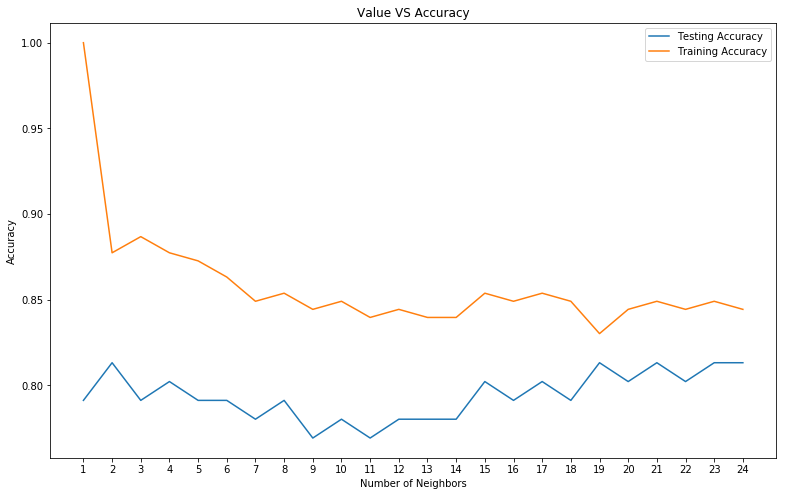

Best accuracy is 0.8131868131868132 with K = 2


In [58]:
#lihat nilai K yg lain
neig = np.arange(1, 25)
train_accuracy = []
test_accuracy = []

for i, k in enumerate(neig):
    # k from 1 to 25(exclude)
    knn = KNeighborsClassifier(n_neighbors=k)
    # Fit with knn
    knn.fit(X_train,y_train)
    #train accuracy
    train_accuracy.append(knn.score(X_train, y_train))
    # test accuracy
    test_accuracy.append(knn.score(X_test, y_test))

# Plot/Visualization
plt.figure(figsize=[13,8])
plt.plot(neig, test_accuracy, label = 'Testing Accuracy')
plt.plot(neig, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.title('Value VS Accuracy')
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.xticks(neig)
# plt.savefig('graph.png')
plt.show()
print("Best accuracy is {} with K = {}".format(np.max(test_accuracy),1+test_accuracy.index(np.max(test_accuracy))))
                           

## 3. Decision Tree Classification (DTC)

In [59]:
# bagi data menjadi training dan test
from sklearn.model_selection import train_test_split,cross_val_score

X_train,X_test,y_train,y_test = train_test_split(X,y ,test_size=0.3,random_state=47) #70 % data latih, 30 % data test

In [60]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score

In [61]:
dtc = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

In [62]:
y_pred = dtc.predict(X_test)

In [63]:
#akurasi
akurasi_score_dtc = accuracy_score(y_test,y_pred)
print(akurasi_score_dtc)

0.7142857142857143


In [64]:
#f1 score
f1_score_dtc = f1_score(y_test, y_pred, average ="macro") #average ada 3 : macro, micro, weighted
print(f1_score_dtc)

0.7125850340136055


In [65]:
# Cross Validation
scores_dtc = cross_val_score(dtc, X, y, cv=5)
print(scores_dtc)
print(scores_dtc.mean())

[0.78688525 0.83606557 0.73770492 0.63333333 0.68333333]
0.7354644808743169


In [66]:
# confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[29 10]
 [16 36]]


In [67]:
# report classification (precision, recall, f1-score, support) #ini antara weigthed atau macro
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

             precision    recall  f1-score   support

          0       0.64      0.74      0.69        39
          1       0.78      0.69      0.73        52

avg / total       0.72      0.71      0.72        91

